# P1 - Experience with Pandas



In this project, you will be working with the Climate Data set:  
http://berkeleyearth.lbl.gov/auto/Global/Complete_TAVG_daily.txt 

Be sure to investigate and understand the data, format, and descriptions provided.



### Project Setup 

You should use the following libraries to complete this assignment:

In [36]:
# Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

## 1. (8 pts) Get the Data

Read in the data from the link provided.  



### 1A. Load the data

Write a function to read in the data to a DataFrame object, print the number of rows, columns, and data types of each column using a print statement.

Make sure to use the same column names as given in the data, but replacing ' ' with '_'.
    
*Hint: Column names should be coded as `Date_Number`, `Year`, `Month`, `Day`, `Day_of_Year`, `Anomaly`.*

In [37]:
# BEGIN SOLUTION
def p1_q1a(url, column_names = None, skipRows = None,):
  df1 = pd.read_csv(url,names= column_names,skiprows = skipRows, delim_whitespace=True)
  print("The number of rows in the data frame is:",df1.shape[0])
  print("The number of columns in the data frame is:",df1.shape[1])
  for col in df1.columns:
    print(col,"is of the data type ",df1[col].dtypes)
  return df1


# END SOLUTION 


""" # BEGIN PROMPT
def p1_q1a(url, column_names=None, skip_row=None, separator=','):
    '''
    - Description - 
    Read in data from URL to a DataFrame object 
    Report the number of rows and columns with a print statement.
    Addtionally, print the data types of each column
    Use pandas.read_csv(...):
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

    - Inputs - 
    url: location of dataset file, filepath_or_buffer
    column_names: list of column names to add to DataFrame (default is None)
    skip_rows: number of header rows to skip in dataset file (default is None)
    separator: delimiter to use (default is a comma)

    - Outputs - 
    df: return object is a DataFrame

    - Print Statements you may use - 
    print("Number of Rows: ...")
    print("Number of Columns: ...")
    print("Column Data Types:")
    print(Data Types)
    '''

    df = pd.read_csv(...)
    print("Number of Rows: " + ...)
    print("Number of Columns: " + ...)
    print("Column Data Types:")
    ...
    return df


url = 'http://berkeleyearth.lbl.gov/auto/Global/Complete_TAVG_daily.txt'
cnames = ...
skipRows = ...
separator = ...   

"""; # END PROMPT 


url = "https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Complete_TAVG_daily.txt"
cnames = ['Date_Number', 'Year', 'Month', 'Day', 'Day_of_Year', 'Anomaly']
skip_Rows = 23
climate = p1_q1a(url, cnames, skipRows=skip_Rows)
climate

The number of rows in the data frame is: 52077
The number of columns in the data frame is: 6
Date_Number is of the data type  float64
Year is of the data type  int64
Month is of the data type  int64
Day is of the data type  int64
Day_of_Year is of the data type  int64
Anomaly is of the data type  float64


,Date_Number,Year,Month,Day,Day_of_Year,Anomaly
0,1880.001,1880,1,1,1,-0.692
1,1880.004,1880,1,2,2,-0.592
2,1880.007,1880,1,3,3,-0.673
3,1880.010,1880,1,4,4,-0.615
4,1880.012,1880,1,5,5,-0.681
...,...,...,...,...,...,...
52072,2022.568,2022,7,27,208,1.639
52073,2022.571,2022,7,28,209,1.631
52074,2022.574,2022,7,29,210,1.574
52075,2022.577,2022,7,30,211,1.577


In [38]:
climate.shape[0] == 51865

False

In [39]:
climate.shape[1] == 6

True

In [40]:
# HIDDEN
sum(climate.dtypes == ['float64', 'int64', 'int64', 'int64', 'int64', 'float64']) == 6

True

In [41]:
# HIDDEN 
climate.iloc[0,0]==1880.001 and climate.iloc[0,5]==-0.534

False

### 1B. Understand the Data

What are the column names and what do they correspond to? *Use this Markdown cell to describe each succinctly (< 15 words per column)*

*Date_Number is the representation of date in a fraction format describing how near the day was in the whole year.
*Year is the year when the observation was made
*Month is the month when the observation was made
*Day is the year day the observation was made
*Day_of_Year is the day of the year when the observation was made
*Anomaly is the average anomaly value calculated

Markup and Latex: alpha square

## 2. (2 pts) Add to the Data

Add a new column to your DataFrame. 

The new column `Temp` adds the anomaly information to the estimated average temperature given in the data. 

In [42]:
# BEGIN SOLUTION NO PROMPT
climate['Temp'] = climate['Anomaly']*8.59


# END SOLUTION
''' # BEGIN PROMPT 
# Create new column "Temp" 
...

'''; # END PROMPT
climate['Temp'].mean()

0.8461370205657112

In [43]:
climate.shape[1] == 7

True

In [44]:
# HIDDEN
np.isclose(climate['Temp'].mean(), 8.6953882)

False

## 3. (30 pts) Calculate and report statistics. 
Pandas DataFrames have several methods for manipulation, aggregation, and calculation of meaningful statistics. The [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) is very helpful to understand attributes and methods. Matplotlib [pyplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html) integrates well with both pandas DataFrames and numpy arrays for visualization tasks.

### 3A. Calculate the mean anomaly by year. 
Create an `Int64Index` of `years` and an array of corresponding `mean_anomaly_year` holding the mean anomaly for each year.   
*Hint: Use methods like `.groupby()` and `.mean()` to get the proper data, then use the `.keys()` method to get an index, and `.values` for an array.*

In [45]:
# BEGIN SOLUTION NO PROMPT

mean_anomaly_year=climate.groupby('Year')['Anomaly'].mean()
years = pd.Int64Index(mean_anomaly_year.keys())
print(mean_anomaly_year.index)
mean_anomaly_year = mean_anomaly_year.values
# END SOLUTION

""" # BEGIN PROMPT 
years = ...
mean_anomaly_year = ...
"""; # END PROMPT

print('Years index:\n', years[0:5])
print('Means array:\n', mean_anomaly_year[0:5])


Int64Index([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
            ...
            2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
           dtype='int64', name='Year', length=143)
Years index:
 Int64Index([1880, 1881, 1882, 1883, 1884], dtype='int64', name='Year')
Means array:
 [-0.59444262 -0.33462192 -0.47347123 -0.59485479 -0.78812022]


In [46]:
len(years) == len(mean_anomaly_year)

True

In [47]:
min(years) == 1880

True

In [48]:
max(years) == 2021

False

In [49]:
# HIDDEN 
np.isclose(mean_anomaly_year[0], -0.005555)

False

In [50]:
# HID
np.isclose(mean_anomaly_year[1], -0.295863)

False

In [51]:
# HIDDEN 
np.isclose(mean_anomaly_year.mean(), 0.10543307)

False

In [52]:
# HIDDEN 
type(years) is pd.core.indexes.numeric.Int64Index

True

### 3B. Calculate the mean temp by year.

Create an array of `mean_temp_year` holding the mean temperature for each year.

In [53]:
# BEGIN SOLUTION NO PROMPT
mean_temp_year = climate.groupby('Year')['Temp'].mean()

# END SOLUTION
""" # BEGIN PROMPT 
mean_temp_year = ...
"""; # END PROMPT

print(mean_temp_year[0:5])

Year
1880   -5.106262
1881   -2.874402
1882   -4.067118
1883   -5.109803
1884   -6.769953
Name: Temp, dtype: float64


In [54]:
len(years) == len(mean_temp_year)

True

In [55]:
# HIDDEN
np.isclose(mean_temp_year[1880], 8.05208743)

False

In [56]:
# HIDDEN
np.isclose(mean_temp_year[1881], 8.29413699)

False

In [57]:
# HIDDEN 
np.isclose(mean_temp_year.mean(), 8.6954330)

False

In [58]:
!jt -t solarizedl
print(type(mean_temp_year))
print(type(years))
numpy_array = np.vstack((mean_temp_year.values, years.values)).T

<class 'pandas.core.series.Series'>
<class 'pandas.core.indexes.numeric.Int64Index'>


### 3C. Plot `mean_temp_year` vs. `years`.
Be sure to include a plot title, x-axis label, and y-axis label. 

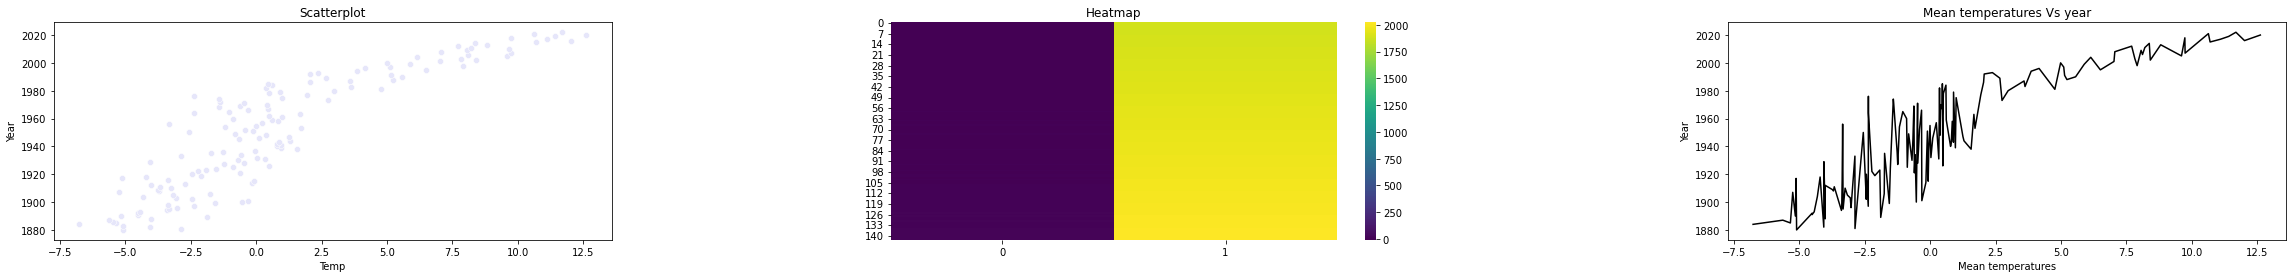

In [59]:
# BEGIN SOLUTION NO PROMPT

fig, axes = plt.subplots(1,3,gridspec_kw={'wspace': 0.5},figsize=(40, 4))
sns.scatterplot(x=mean_temp_year,y=years,color='lavender',ax=axes[0])
axes[0].set_title('Scatterplot')
sns.heatmap(numpy_array, cmap ='viridis',ax=axes[1])
axes[1].set_title('Heatmap')
sns.lineplot(x=mean_temp_year,y=years,color='black',ax=axes[2])
axes[2].set_title('LinePlot')
plt.title("Mean temperatures Vs year")
plt.xlabel("Mean temperatures")
plt.ylabel("Year")
plt.show()


# END SOLUTION
""" # BEGIN PROMPT
# Plot for each year (x-axis) vs. the "mean_temp_year" value (y-axis)


"""; # END PROMPT

### 3D. Calculate the mean anomaly by month
Create an `Int64Index` index of `months` and an array of `mean_anomaly_month` with the mean anomaly for each month. 

In [60]:
# BEGIN SOLUTION NO PROMPT

mean_anomaly_month = climate.groupby('Month')['Anomaly'].mean()
months = pd.Int64Index(mean_anomaly_month.keys())
mean_anomaly_month_values = mean_anomaly_month.values

# END SOLUTION
""" # BEGIN PROMPT 
months = ...
mean_anomaly_month = ...
"""; # END PROMPT

print('Months index:\n', months[0:5])
print('Means array:\n', mean_anomaly_month[0:5])

Months index:
 Int64Index([1, 2, 3, 4, 5], dtype='int64', name='Month')
Means array:
 Month
1    0.016167
2    0.032804
3    0.148859
4    0.312750
5    0.174846
Name: Anomaly, dtype: float64


In [61]:
len(months) == len(mean_anomaly_month)

True

In [62]:
# HIDDEN
np.isclose(mean_anomaly_month_values[0], -0.027709)

False

In [63]:
# HIDDEN 
np.isclose(mean_anomaly_month_values[1], 0.0090812)

False

In [64]:
# HIDDEN 
np.isclose(mean_anomaly_month.mean(), 0.104825)

False

In [65]:
# HIDDEN 
type(months) is pd.core.indexes.numeric.Int64Index

True

### 3E. Plot mean anomaly by month in a bar chart

Be sure to include a plot title, x-axis label, y-axis label, and black horizontal line at 0 mean anomaly on the plot. This will help to visually reference positive and negative bars.

Label xticks with abbreviations for months: Jan, Feb, Mar, Apr, ...

In [66]:
print('Means array:\n', mean_anomaly_month[0:5])
print(type(mean_anomaly_month))

Means array:
 Month
1    0.016167
2    0.032804
3    0.148859
4    0.312750
5    0.174846
Name: Anomaly, dtype: float64
<class 'pandas.core.series.Series'>


Month
1     0.016167
2     0.032804
3     0.148859
4     0.312750
5     0.174846
6     0.130883
7     0.152596
8     0.085235
9     0.038015
10    0.164561
11   -0.063840
12   -0.017871
Name: Anomaly, dtype: float64


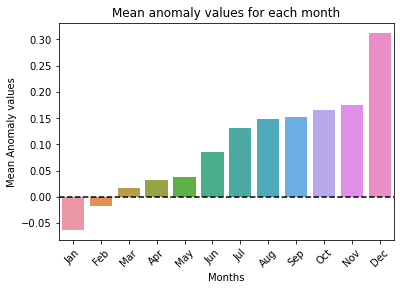

In [77]:
# BEGIN SOLUTION NO PROMPT
print(mean_anomaly_month)
sns.barplot(data=mean_anomaly_month, x=mean_anomaly_month.index, y=mean_anomaly_month.values)
plt.xlabel("Months")
plt.ylabel("Mean Anomaly values")
plt.title("Mean anomaly values for each month")
threshold = 0
plt.axhline(y=threshold, color='black', linestyle='--')
plt.xticks(ticks=range(12),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=45)
plt.show()
# END SOLUTION 
""" # BEGIN PROMPT 
# Plot the mean anomaly by month vs month in a bar chart
#  Make sure there is a horizontal line for 0 mean anomaly on the plot
#  Label xticks with abbreviations for months: Jan, Feb, Mar, Apr, ...

"""; # END PROMPT

### 3F. Plot a histogram of the Anomaly data.
Be sure to include a plot title, x-axis label, and y-axis label.

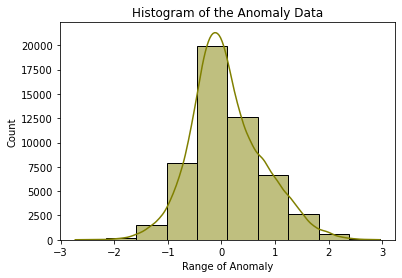

In [68]:
# BEGIN SOLUTION
sns.histplot(climate['Anomaly'],bins=10,kde=True,color='olive')
plt.title("Histogram of the Anomaly Data")
plt.xlabel("Range of Anomaly")
plt.ylabel("Count")
plt.show()
# END SOLUTION

### 3G. Bonus 

#### (1) Recreate the plot from 3C  
Add a horizontal line at the estimated land-average temp. 




<Figure size 2880x288 with 0 Axes>

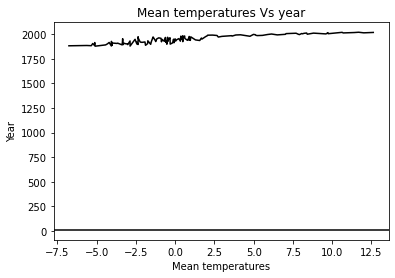

<Figure size 2880x288 with 0 Axes>

In [69]:
# BEGIN SOLUTION
sns.lineplot(x=mean_temp_year,y=years,color='black')
threshold = 8.59
plt.axhline(threshold, color ='black')
plt.title("Mean temperatures Vs year")
plt.xlabel("Mean temperatures")
plt.ylabel("Year")
plt.figure(figsize=(40,4))


# END SOLUTION

#### (2) Recreate the plot from 3E 
Color the positive bars in black and the negative bars in red.

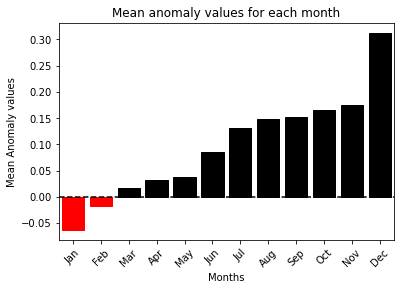

In [74]:

sns.barplot(data=mean_anomaly_month, x=mean_anomaly_month.index, y=mean_anomaly_month.values)

plt.xlabel("Months")
plt.ylabel("Mean Anomaly values")
plt.title("Mean anomaly values for each month")

threshold = 0
plt.axhline(y=threshold, color='black', linestyle='--')


plt.xticks(ticks=range(12), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=45)

for bar in plt.gca().patches:
    if bar.get_height() >= 0:
        bar.set_color('black')
    else:
        bar.set_color('red')

plt.show()


# END SOLUTION